In [125]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sgn

from raspi_import import raspi_import


sample_period, data = raspi_import("./out/radar1.bin")
print(sample_period)
print(1000000/sample_period)
n_start = 40000
n_stop = 60000

def prepros (data, maximum = 4096):
    d = data / maximum
    #d = d - 0.5
    d = sgn.detrend(d)
    #d = d - np.mean(d)
    return d

plt.plot(data[:,4])
plt.show()

q = prepros(data[n_start:n_stop,4])

i =  prepros(data[n_start:n_stop,3])


plt.plot(i)
plt.show()

fft = (np.abs(np.fft.fft(i)[2:-2]))
print(sample_period)
plt.xlim(-3000,3000)
plt.ylim(0,200)
plt.plot(np.fft.fftshift(np.fft.fftfreq(len(fft),sample_period*2/(1e6))),np.fft.fftshift(fft))
plt.show()
fft_i = np.abs(np.fft.fft(i)[:len(fft)//2])
fft_q = np.abs(np.fft.fft(q))


#cross = sgn.correlate(fft_i,fft_q)
#plt.plot( cross)
#plt.show()

m = np.amax(fft_i)
mx = np.where(fft_i == m)[0][0]
print(mx)

fn = ((mx / (len(fft)))) * 31250


print(fn )
f_0 = 24.13e9
c = 3e8
v = ( c*(fn) )/ (2*(f_0))

print(v, v*3.6)

def windowedcorr(x,y, maxlag):
    rxy = np.zeros(2*maxlag)
    for l in range(0, 2*maxlag):
        rxy[l] = np.sum(np.roll(x, maxlag - l)*y) 
    
    return rxy



def findCorrPeaks(data):
    #interpolate
    resample_coeff = 2
    #data = filter(data) #np.fft.fft(signal)
    data = sgn.resample(data, len(data)*resample_coeff)
    
    maxlag = min(1000, len(data))
    number_of_peaks = 5
    corr = windowedcorr(data,data,maxlag)

    abs_corr = np.abs(corr)[((len(corr)//2)):len(corr)]
    
    max_peaks = sgn.find_peaks(abs_corr, prominence=0.3)[0]

    max_peaks = max_peaks[0: min(number_of_peaks, len(max_peaks) ) ]
    plt.plot(abs_corr, "-d", markevery=max_peaks.tolist())
    plt.show()
    
    return max_peaks/resample_coeff

peaks  = findCorrPeaks(i)
if(len(peaks) > 0):
    arr = np.zeros(len(peaks) - 1)
    for n in range(len(peaks)-1):
        arr[n] = peaks[n + 1] - peaks[n]
    meanlag = arr.mean()
    print(meanlag)
    fn =  31250/(meanlag*2)
    print(fn)
    f_0 = 24.13e9
    c = 3e8
    v = ( c*(fn) )/ (2*(f_0))
    print(v)
else:
    print("Could not compute")
 

32.0
31250.0
32.0
437
682.9490898179636
4.2454357013134905 15.283568524728565
Could not compute


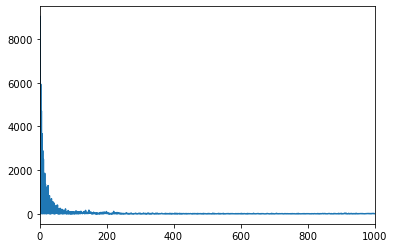

1
0.0067009402187501385


In [10]:
corr = np.abs(sgn.correlate(i,q))
corr = sgn.detrend(corr)
plt.xlim(0,1000)
fft = np.abs(np.fft.fft(corr))[10:len(i)//2]
plt.plot(fft)
plt.show()
m = np.amax(fft)
mi = np.where(fft == m)[0][0]
print(mi)
fn = ((mi / (len(fft)))) * 31250

f_0 = 24.13e9
c = 3e8
v = ( c*(fn) )/ (2*(f_0))
print(v)

In [12]:


def findVelocity(data, start, stop):
    q = prepros(data[start:stop,3])

    i =  prepros(data[start:stop,4])

    fft_i = np.abs(np.fft.fft(i)[:len(i)//2])
    fft_q = np.abs(np.fft.fft(q)[:len(i)//2])
    
    direction = 1 if ( np.mean(np.arctan2(fft_q, fft_i)) > 0 ) else -1
    
    m = np.amax(fft_i)
    i = np.where(fft_i == m)[0][0]
    
    fn = ((i / (len(fft)))) * 31250

    f_0 = 24.13e9
    c = 3e8
    v = ( c*(fn) )/ (2*(f_0))
    return direction*v



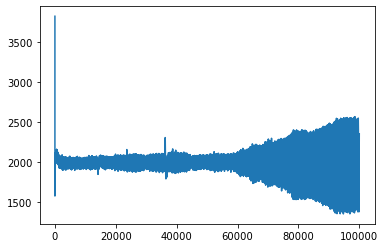

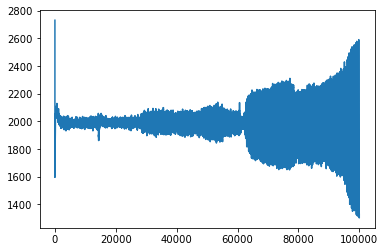

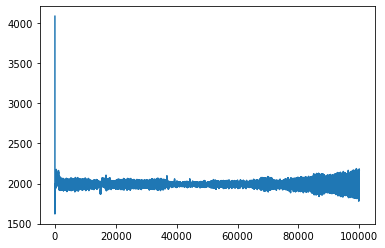

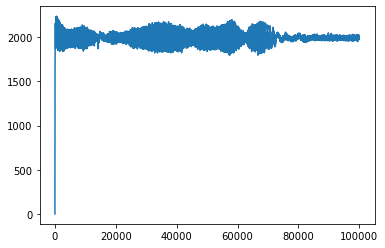

0.7773090653750161
0.8577203480000177
0.8108137664687666
1.44740308725003


In [13]:
sample_period, data1 = raspi_import("./raw_data/adcData_1.bin")
sample_period, data2 = raspi_import("./raw_data/adcData_2.bin")
sample_period, data3 = raspi_import("./raw_data/adcData_3.bin")
sample_period, data4 = raspi_import("./raw_data/adcData_4.bin")

plt.plot(data1[:,3])
plt.show()
plt.plot(data2[:,3])
plt.show()
plt.plot(data3[:,3])
plt.show()
plt.plot(data4[:,3])
plt.show()
start = 4000
v1 = findVelocity(data1, 20000, 60000)
v2 = findVelocity(data2, 20000,60000)
v3 = findVelocity(data3, 40000,80000)
v4 = findVelocity(data4, 10000,60000)

print(v1)
print(v2)
print(v3)
print(v4)

![text](./Screenshots/sheets.jpg)


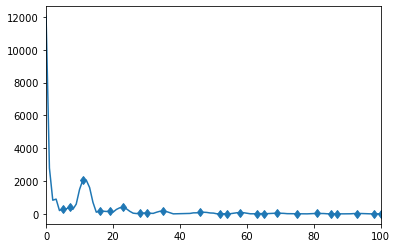

11
710.2272727272727
velocity  4.415005839581057


In [36]:
data = i
maxlag = 1000
number_of_peaks = 100
corr = windowedcorr(data,data,maxlag)

abs_corr = np.abs(corr)[((len(corr)//2)):len(corr)]
fft_corr = np.abs(np.fft.fft(np.abs(corr)))[0:len(corr)//2]
fft_corr = sgn.savgol_filter(fft_corr,7,3)

max_peaks = sgn.find_peaks(fft_corr, prominence=0.6)[0]

max_peaks = max_peaks[0: min(number_of_peaks, len(max_peaks) ) ]
plt.xlim(0,100)
plt.plot((np.abs(fft_corr)),"-d", markevery=max_peaks.tolist())
plt.show()

mx = np.where(fft_corr == np.amax(fft_corr[max_peaks]))[0][0]
print(mx)
fn =  31250/(mx*4)
print(fn)
f_0 = 24.13e9
c = 3e8
v = ( c*(fn) )/ (2*(f_0))
print("velocity ", v)

In [21]:
%matplotlib qt
plt.plot(np.fft.fftshift(np.fft.fftfreq(len(fft),sample_period/(1e6))),np.fft.fftshift(fft))
plt.show()

In [124]:
%matplotlib qt
from mpl_toolkits.mplot3d import Axes3D


f_0 = 24.13e9
c = 3e8
v = 3.14/2.4
#v=1,08 for data 61-65
#v=0,77 for data 51-55
#v=1,50 for data 41-45
#v=0,26 for data 31-35
#v=0,69 for data 24-28

sample_period, data = raspi_import("./adcData/adcData1-3.14.bin")

n_start = 40000
n_stop = 60000

f = v*(2*(f_0))/(c)
plt.axvline(x=f, ymin=0, ymax=50, label='Doppler frequency')
q = prepros(data[0:0 + 5000,3])
fft = (np.abs(np.fft.fft(q)[2:-2]))

j = 0
for i in range(0, data.shape[0], 5000):

    q = prepros(data[i:i + 5000,3])
    fft = (np.abs(np.fft.fft(q)[2:-2]))
    
    plt.xlim(-3000,3000)
    plt.plot(np.fft.fftshift(np.fft.fftfreq(len(fft),sample_period/(1e6))) - j*3,np.fft.fftshift(fft) - j, label='From ' + str(i) + " To " + str(i +10000))
    plt.legend()
    j += 10
plt.show()